In [12]:
from unityagents import UnityEnvironment
import copy

In [13]:
from model import get_model
from helpers import train_model, save_model, plot_losses, plot_scores, test_model, load_model

In [3]:
# hyperparameters
lr = 0.005
gamma = 0.9

batch_size = 25
buffer_size = 5000

c = 50
c_step = 0
e = 0.01
a = 0.6

input_depth = 37
hidden0 = 250
hidden1 = 150
hidden2 = 100
output_depth = 4

replay = []

In [4]:
model, loss_fn, optimizer = get_model(input_depth, hidden0, hidden1, hidden2, output_depth, lr)
model_ = copy.deepcopy(model)

In [5]:
env = UnityEnvironment(file_name="Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
# train model

epochs = 1000
epsilon = 1.0 # decays over the course of training
losses = []
scores = []

hyperparams = (epochs, epsilon, gamma)
actor_env = (model, model_, brain_name, env)
training = (loss_fn, optimizer)
exp_replay = (buffer_size, replay, batch_size)
double_per = (e, a, c, c_step)
metrics = (losses, scores)

train_model(hyperparams, actor_env, training, exp_replay, double_per, metrics)

cpu
epoch 0, loss: 0.00, score: -1.0
epoch 1, loss: 0.00, score: 0.0
epoch 2, loss: 0.00, score: 0.0
epoch 3, loss: 0.00, score: -1.0
epoch 4, loss: 0.00, score: 0.0
epoch 5, loss: 0.00, score: 0.0
epoch 6, loss: 0.00, score: -1.0
epoch 7, loss: 0.00, score: -1.0
epoch 8, loss: 0.00, score: 1.0
epoch 9, loss: 0.00, score: 0.0
epoch 10, loss: 0.00, score: 0.0
epoch 11, loss: 0.00, score: 0.0
epoch 12, loss: 0.00, score: 0.0
epoch 13, loss: 0.00, score: 0.0
epoch 14, loss: 0.00, score: 0.0
epoch 15, loss: 0.00, score: -1.0
epoch 16, loss: 56718.50, score: -1.0
epoch 17, loss: 14689.63, score: 0.0
epoch 18, loss: 8426.11, score: 0.0
epoch 19, loss: 5903.80, score: -2.0
epoch 20, loss: 4543.08, score: -4.0
epoch 21, loss: 3692.05, score: -2.0
epoch 22, loss: 3109.52, score: 0.0
epoch 23, loss: 2685.78, score: 1.0
epoch 24, loss: 2363.67, score: 0.0
epoch 25, loss: 2110.55, score: 0.0
epoch 26, loss: 1906.40, score: 0.0
epoch 27, loss: 1738.26, score: 0.0
epoch 28, loss: 1597.37, score: 0.0

epoch 230, loss: 92.79, score: 2.0
epoch 231, loss: 92.36, score: 1.0
epoch 232, loss: 91.94, score: 0.0
epoch 233, loss: 91.52, score: 0.0
epoch 234, loss: 91.11, score: -1.0
epoch 235, loss: 90.70, score: 0.0
epoch 236, loss: 90.29, score: -1.0
epoch 237, loss: 89.89, score: -2.0
epoch 238, loss: 89.49, score: 0.0
epoch 239, loss: 89.10, score: 0.0
epoch 240, loss: 88.70, score: 0.0
epoch 241, loss: 88.32, score: 1.0
epoch 242, loss: 87.93, score: -2.0
epoch 243, loss: 87.55, score: 1.0
epoch 244, loss: 87.17, score: 2.0
epoch 245, loss: 86.80, score: 1.0
epoch 246, loss: 86.43, score: -1.0
epoch 247, loss: 86.06, score: 0.0
epoch 248, loss: 85.69, score: 1.0
epoch 249, loss: 85.33, score: 0.0
epoch 250, loss: 84.97, score: 0.0
epoch 251, loss: 84.62, score: -1.0
epoch 252, loss: 84.26, score: 2.0
epoch 253, loss: 83.92, score: 2.0
epoch 254, loss: 83.57, score: 0.0
epoch 255, loss: 83.23, score: 0.0
epoch 256, loss: 82.89, score: 1.0
epoch 257, loss: 82.55, score: 0.0
epoch 258, los

epoch 462, loss: 45.28, score: 0.0
epoch 463, loss: 45.18, score: 2.0
epoch 464, loss: 45.09, score: 1.0
epoch 465, loss: 44.99, score: 0.0
epoch 466, loss: 44.89, score: 0.0
epoch 467, loss: 44.80, score: -2.0
epoch 468, loss: 44.70, score: 0.0
epoch 469, loss: 44.61, score: -2.0
epoch 470, loss: 44.51, score: 4.0
epoch 471, loss: 44.42, score: 1.0
epoch 472, loss: 44.32, score: 0.0
epoch 473, loss: 44.23, score: 1.0
epoch 474, loss: 44.14, score: 2.0
epoch 475, loss: 44.04, score: -2.0
epoch 476, loss: 43.95, score: -2.0
epoch 477, loss: 43.86, score: -2.0
epoch 478, loss: 43.77, score: 1.0
epoch 479, loss: 43.68, score: 0.0
epoch 480, loss: 43.59, score: -1.0
epoch 481, loss: 43.50, score: -2.0
epoch 482, loss: 43.41, score: 2.0
epoch 483, loss: 43.32, score: 0.0
epoch 484, loss: 43.23, score: -2.0
epoch 485, loss: 43.14, score: -1.0
epoch 486, loss: 43.05, score: -1.0
epoch 487, loss: 42.96, score: 0.0
epoch 488, loss: 42.88, score: -1.0
epoch 489, loss: 42.79, score: 0.0
epoch 490

epoch 694, loss: 30.27, score: 0.0
epoch 695, loss: 30.23, score: 0.0
epoch 696, loss: 30.19, score: 0.0
epoch 697, loss: 30.14, score: 1.0
epoch 698, loss: 30.10, score: -2.0
epoch 699, loss: 30.06, score: 3.0
epoch 700, loss: 30.01, score: -2.0
epoch 701, loss: 29.97, score: -1.0
epoch 702, loss: 29.93, score: 1.0
epoch 703, loss: 29.89, score: 1.0
epoch 704, loss: 29.85, score: 0.0
epoch 705, loss: 29.80, score: 0.0
epoch 706, loss: 29.76, score: 0.0
epoch 707, loss: 29.72, score: 1.0
epoch 708, loss: 29.68, score: -4.0
epoch 709, loss: 29.64, score: 1.0
epoch 710, loss: 29.60, score: -1.0
epoch 711, loss: 29.56, score: 0.0
epoch 712, loss: 29.52, score: 0.0
epoch 713, loss: 29.47, score: 0.0
epoch 714, loss: 29.43, score: 1.0
epoch 715, loss: 29.39, score: -1.0
epoch 716, loss: 29.35, score: 1.0
epoch 717, loss: 29.31, score: -1.0
epoch 718, loss: 29.27, score: -1.0
epoch 719, loss: 29.23, score: 0.0
epoch 720, loss: 29.19, score: 0.0
epoch 721, loss: 29.15, score: 0.0
epoch 722, l

epoch 926, loss: 22.90, score: 1.0
epoch 927, loss: 22.87, score: 1.0
epoch 928, loss: 22.85, score: 0.0
epoch 929, loss: 22.83, score: 2.0
epoch 930, loss: 22.80, score: 0.0
epoch 931, loss: 22.78, score: -3.0
epoch 932, loss: 22.76, score: 0.0
epoch 933, loss: 22.73, score: 0.0
epoch 934, loss: 22.71, score: -1.0
epoch 935, loss: 22.69, score: 1.0
epoch 936, loss: 22.66, score: 0.0
epoch 937, loss: 22.64, score: -1.0
epoch 938, loss: 22.62, score: 0.0
epoch 939, loss: 22.59, score: 0.0
epoch 940, loss: 22.57, score: 1.0
epoch 941, loss: 22.55, score: -2.0
epoch 942, loss: 22.52, score: 0.0
epoch 943, loss: 22.50, score: -2.0
epoch 944, loss: 22.48, score: 0.0
epoch 945, loss: 22.46, score: -1.0
epoch 946, loss: 22.43, score: -1.0
epoch 947, loss: 22.41, score: 2.0
epoch 948, loss: 22.39, score: 0.0
epoch 949, loss: 22.37, score: -5.0
epoch 950, loss: 22.35, score: -1.0
epoch 951, loss: 22.32, score: 0.0
epoch 952, loss: 22.30, score: -1.0
epoch 953, loss: 22.28, score: 0.0
epoch 954,

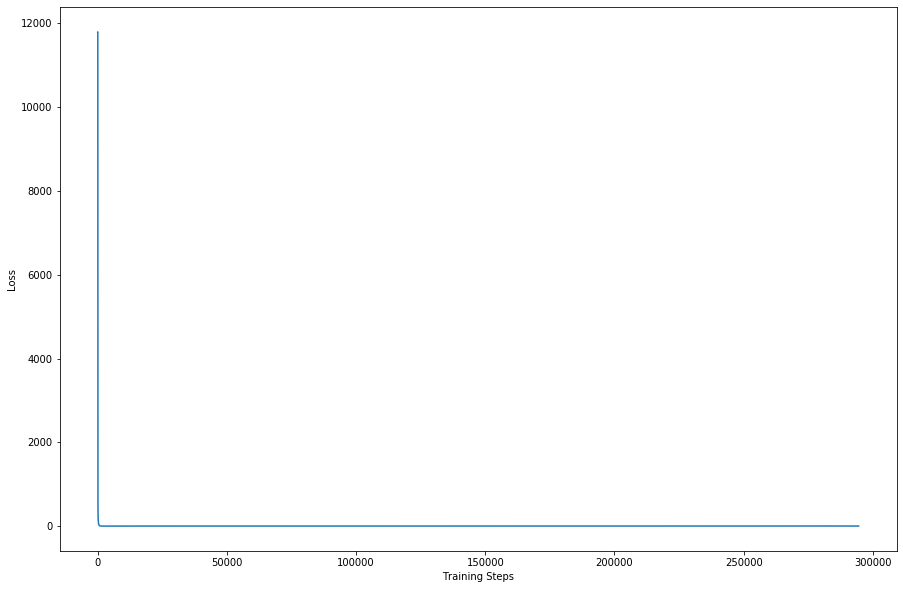

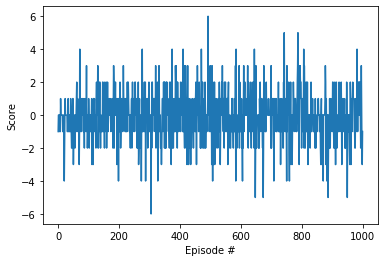

<Figure size 432x288 with 0 Axes>

In [7]:
# evaluate training

plot_losses(losses, 'losses-1000.png')
plot_scores(scores, 'scores-1000.png')

In [8]:
# save model

save_model(model, optimizer, replay, 'checkpoint-1000.pt')

cpu
Avg. score: 0.1, with a high of: 3.0


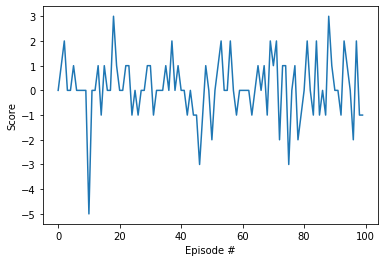

<Figure size 432x288 with 0 Axes>

In [9]:
# test model

test_actor_env = (model, brain_name, env)
attemps = 100
filename = 'test_scores-1000.png'

test_model(test_actor_env, attemps, filename)

In [6]:
filename = 'checkpoint-1000.pt'
model, optimizer, replay = load_model(model, optimizer, filename)

In [7]:
# train model

epochs = 1000
epsilon = 0.5 # decays over the course of training
batch_size = 50
buffer_size = 7500

losses = []
scores = []

hyperparams = (epochs, epsilon, gamma)
actor_env = (model, model_, brain_name, env)
training = (loss_fn, optimizer)
exp_replay = (buffer_size, replay, batch_size)
double_per = (e, a, c, c_step)
metrics = (losses, scores)

train_model(hyperparams, actor_env, training, exp_replay, double_per, metrics)

cpu
epoch 0, loss: 0.00, score: 2.0
epoch 1, loss: 0.00, score: 1.0
epoch 2, loss: 0.00, score: 0.0
epoch 3, loss: 0.00, score: 0.0
epoch 4, loss: 0.00, score: -1.0
epoch 5, loss: 0.00, score: -3.0
epoch 6, loss: 0.00, score: -2.0
epoch 7, loss: 0.00, score: -1.0
epoch 8, loss: 3.45, score: -1.0
epoch 9, loss: 3.62, score: 0.0
epoch 10, loss: 3.58, score: 0.0
epoch 11, loss: 3.55, score: 0.0
epoch 12, loss: 3.55, score: -4.0
epoch 13, loss: 3.56, score: 0.0
epoch 14, loss: 3.52, score: -1.0
epoch 15, loss: 3.54, score: 0.0
epoch 16, loss: 3.51, score: 0.0
epoch 17, loss: 3.48, score: 1.0
epoch 18, loss: 3.45, score: 1.0
epoch 19, loss: 3.43, score: 0.0
epoch 20, loss: 3.41, score: 1.0
epoch 21, loss: 3.40, score: 0.0
epoch 22, loss: 3.38, score: 0.0
epoch 23, loss: 3.35, score: 0.0
epoch 24, loss: 3.32, score: 1.0
epoch 25, loss: 3.28, score: -2.0
epoch 26, loss: 3.24, score: 1.0
epoch 27, loss: 3.20, score: 1.0
epoch 28, loss: 3.15, score: 0.0
epoch 29, loss: 3.11, score: 0.0
epoch 30

epoch 242, loss: 2.56, score: -3.0
epoch 243, loss: 2.55, score: 0.0
epoch 244, loss: 2.55, score: 0.0
epoch 245, loss: 2.54, score: 0.0
epoch 246, loss: 2.54, score: 0.0
epoch 247, loss: 2.53, score: 0.0
epoch 248, loss: 2.53, score: 1.0
epoch 249, loss: 2.52, score: 1.0
epoch 250, loss: 2.52, score: -1.0
epoch 251, loss: 2.52, score: -2.0
epoch 252, loss: 2.52, score: 0.0
epoch 253, loss: 2.51, score: 1.0
epoch 254, loss: 2.51, score: -2.0
epoch 255, loss: 2.51, score: 1.0
epoch 256, loss: 2.51, score: 2.0
epoch 257, loss: 2.51, score: -2.0
epoch 258, loss: 2.51, score: -1.0
epoch 259, loss: 2.51, score: 1.0
epoch 260, loss: 2.52, score: 0.0
epoch 261, loss: 2.52, score: 0.0
epoch 262, loss: 2.52, score: 2.0
epoch 263, loss: 2.52, score: -1.0
epoch 264, loss: 2.53, score: 1.0
epoch 265, loss: 2.53, score: 0.0
epoch 266, loss: 2.54, score: -1.0
epoch 267, loss: 2.54, score: -1.0
epoch 268, loss: 2.54, score: 0.0
epoch 269, loss: 2.55, score: 2.0
epoch 270, loss: 2.55, score: 1.0
epoch

epoch 481, loss: 2.74, score: 0.0
epoch 482, loss: 2.74, score: 0.0
epoch 483, loss: 2.74, score: 1.0
epoch 484, loss: 2.74, score: -1.0
epoch 485, loss: 2.74, score: 0.0
epoch 486, loss: 2.74, score: -2.0
epoch 487, loss: 2.74, score: 2.0
epoch 488, loss: 2.74, score: -1.0
epoch 489, loss: 2.74, score: 0.0
epoch 490, loss: 2.74, score: 1.0
epoch 491, loss: 2.74, score: 0.0
epoch 492, loss: 2.74, score: 0.0
epoch 493, loss: 2.74, score: 0.0
epoch 494, loss: 2.74, score: 1.0
epoch 495, loss: 2.74, score: 4.0
epoch 496, loss: 2.74, score: 1.0
epoch 497, loss: 2.74, score: 0.0
epoch 498, loss: 2.74, score: -2.0
epoch 499, loss: 2.74, score: -1.0
epoch 500, loss: 2.74, score: 3.0
epoch 501, loss: 2.74, score: 1.0
epoch 502, loss: 2.74, score: -2.0
epoch 503, loss: 2.74, score: 0.0
epoch 504, loss: 2.74, score: -2.0
epoch 505, loss: 2.75, score: 2.0
epoch 506, loss: 2.75, score: 0.0
epoch 507, loss: 2.75, score: -1.0
epoch 508, loss: 2.75, score: 1.0
epoch 509, loss: 2.75, score: -3.0
epoch

epoch 720, loss: 2.86, score: -1.0
epoch 721, loss: 2.86, score: 1.0
epoch 722, loss: 2.86, score: -2.0
epoch 723, loss: 2.86, score: 1.0
epoch 724, loss: 2.86, score: -2.0
epoch 725, loss: 2.86, score: 0.0
epoch 726, loss: 2.86, score: 1.0
epoch 727, loss: 2.86, score: 2.0
epoch 728, loss: 2.86, score: 1.0
epoch 729, loss: 2.86, score: -1.0
epoch 730, loss: 2.87, score: -1.0
epoch 731, loss: 2.87, score: 1.0
epoch 732, loss: 2.87, score: 1.0
epoch 733, loss: 2.87, score: -2.0
epoch 734, loss: 2.87, score: 0.0
epoch 735, loss: 2.87, score: -1.0
epoch 736, loss: 2.87, score: 1.0
epoch 737, loss: 2.87, score: 0.0
epoch 738, loss: 2.87, score: -2.0
epoch 739, loss: 2.87, score: 0.0
epoch 740, loss: 2.87, score: 0.0
epoch 741, loss: 2.87, score: -1.0
epoch 742, loss: 2.87, score: 0.0
epoch 743, loss: 2.87, score: -1.0
epoch 744, loss: 2.87, score: 0.0
epoch 745, loss: 2.87, score: 0.0
epoch 746, loss: 2.87, score: -1.0
epoch 747, loss: 2.87, score: 0.0
epoch 748, loss: 2.87, score: -2.0
ep

epoch 959, loss: 2.80, score: -1.0
epoch 960, loss: 2.80, score: -2.0
epoch 961, loss: 2.80, score: 2.0
epoch 962, loss: 2.80, score: 0.0
epoch 963, loss: 2.80, score: 0.0
epoch 964, loss: 2.80, score: 0.0
epoch 965, loss: 2.80, score: -2.0
epoch 966, loss: 2.80, score: 0.0
epoch 967, loss: 2.80, score: -1.0
epoch 968, loss: 2.80, score: 1.0
epoch 969, loss: 2.80, score: 5.0
epoch 970, loss: 2.80, score: -3.0
epoch 971, loss: 2.80, score: -1.0
epoch 972, loss: 2.80, score: -2.0
epoch 973, loss: 2.80, score: 0.0
epoch 974, loss: 2.80, score: 1.0
epoch 975, loss: 2.80, score: 2.0
epoch 976, loss: 2.80, score: 1.0
epoch 977, loss: 2.80, score: -1.0
epoch 978, loss: 2.80, score: 3.0
epoch 979, loss: 2.81, score: 1.0
epoch 980, loss: 2.81, score: 0.0
epoch 981, loss: 2.81, score: -3.0
epoch 982, loss: 2.81, score: -1.0
epoch 983, loss: 2.81, score: 0.0
epoch 984, loss: 2.81, score: 0.0
epoch 985, loss: 2.81, score: -1.0
epoch 986, loss: 2.81, score: 0.0
epoch 987, loss: 2.81, score: 2.0
epo

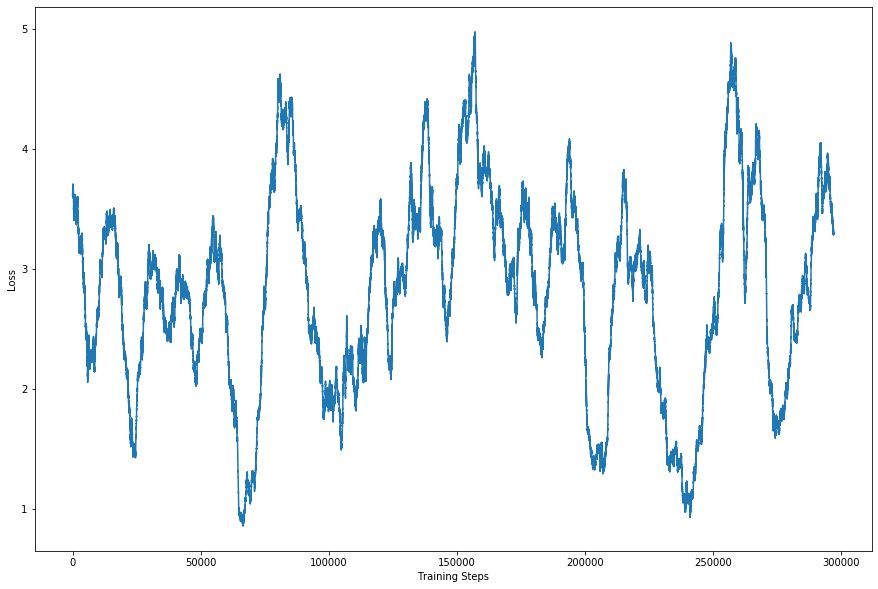

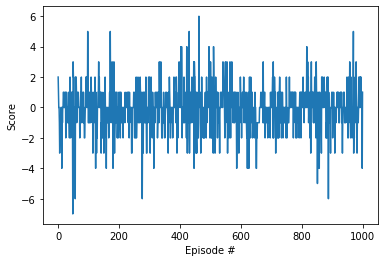

<Figure size 432x288 with 0 Axes>

In [8]:
# evaluate training

plot_losses(losses, 'losses-2000.png')
plot_scores(scores, 'scores-2000.png')

In [9]:
# save model

save_model(model, optimizer, replay, 'checkpoint-2000.pt')

cpu
Avg. score: 0.0, with a high of: 2.0


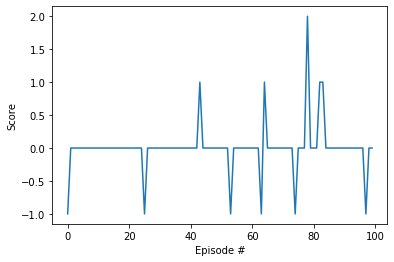

<Figure size 432x288 with 0 Axes>

In [10]:
# test model

test_actor_env = (model, brain_name, env)
attemps = 100
filename = 'test_scores-2000.png'

test_model(test_actor_env, attemps, filename)

In [ ]:
env.close()